**In case normal cellpose 3D is not working due to anisotropy, this code could be used for stiching 2D segmentation, thus generating 3D segments. Works well in colab/cluster**

In [ ]:
pip install pocl-binary-distribution

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 9.6 MB/s eta 0:00:00


In [ ]:
pip install pyclesperanto

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.4 MB/s eta 0:00:00


In [ ]:
!pip install "opencv-python-headless<4.3"
!pip install cellpose
!pip install pyclesperanto-prototype

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.74
    Uninstalling opencv-python-headless-4.8.0.74:
      Successfully uninstalled opencv-python-headless-4.8.0.74
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.2.1 requires opencv-python-headless>=4.1.1, but you have opencv-python-headless 3.4.18.65 which is incompatible.
qudida 0.0.4 requires opencv-python-headless>=4.0.1, but you have opencv-python-headless 3.4.18.65 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.7/171.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
import pyclesperanto as cle
import skimage
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.transform import rescale
from urllib.parse import urlparse
from cellpose import models, core
from cellpose.io import logger_setup
from cellpose import utils


In [ ]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)
logger_setup();

>>> GPU activated? 1
creating new log file


In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
Mon Jul 24 17:19:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W /  70W |    105MiB / 15360MiB |      0%      Default |
|                               |       

In [ ]:
model = models.Cellpose(gpu=use_GPU, model_type='cyto')
channels = [0,0]


100%|██████████| 25.3M/25.3M [00:00<00:00, 83.6MB/s]
100%|██████████| 5.23k/5.23k [00:00<00:00, 5.35MB/s]


In [ ]:
img = io.imread(r'/content/drive/MyDrive/downscaled_lat_line_3D_6')


In [ ]:
min_value = np.min(img)
max_value = np.max(img)

img_c = 255 * (img - min_value) / (max_value - min_value)
img_c = img_c.astype(np.uint8)


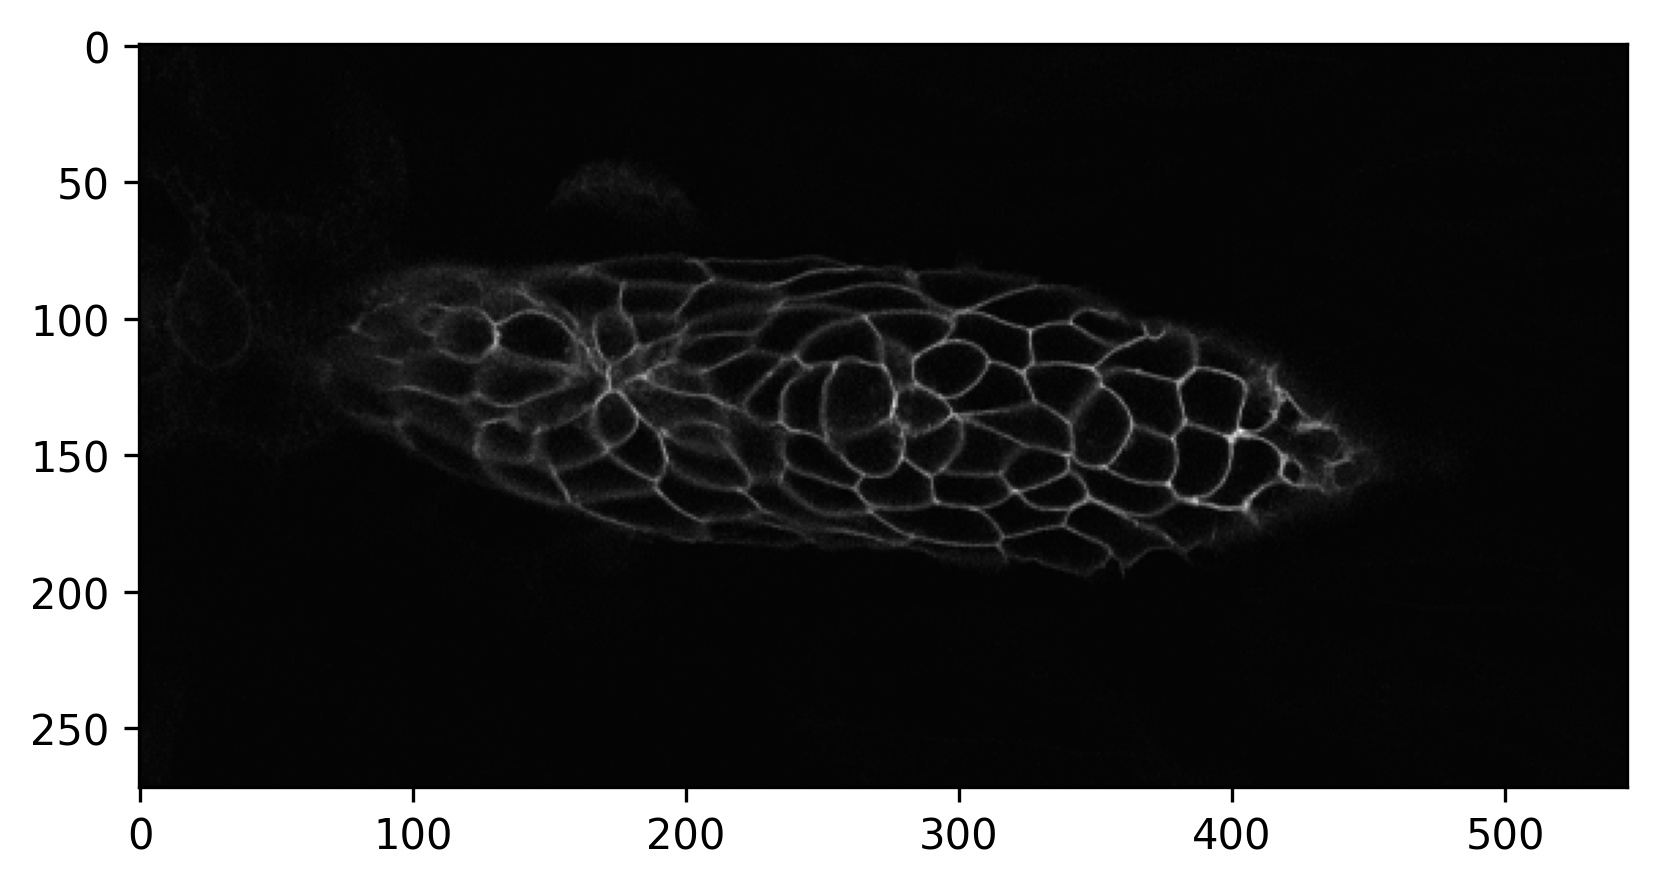

In [ ]:
plt.imshow(img[42,:,:], cmap='gray')

In [ ]:
masks, flows, styles, diams = model.eval(img_xy, diameter=40, channels=[0,0],
                                         flow_threshold=0.9, do_3D=False)


NameError: ignored

In [ ]:
# 2. computes masks in 2D slices and stitches masks in 3D based on mask overlap
print('running cellpose 2D + stitching masks')
masks_stitched, flows_stitched, styles_stitched, _ = model.eval(img, channels=[0,0], diameter=35, do_3D=False, stitch_threshold=0.5)

running cellpose 2D + stitching masks


In [ ]:
diams = 35

In [ ]:
channels = [0,0]


In [ ]:
from cellpose import io

io.masks_flows_to_seg(img,
                      masks_stitched,
                      flows_stitched,
                      diams,
                      file_names='/content/drive/MyDrive/Cellpose_Test/stich_seg.npy',
                      channels=[0, 0])

**save the masks locally, open them locally with napari**